### Задание: многостраничный отчет
Используя данные по активностям в парках Москвы \
https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json 

Создайте PDF отчет, в котором выведите:
1. Диаграмму распределения числа активностей по паркам, топ10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк

Сколько активностей Тайцзицюань есть в парках Москвы?

In [2]:
import requests
import pandas as pd
import json

# Получение данных

r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
# print(json.loads(r.content))
df = pd.DataFrame(json.loads(r.content)).fillna(value=0) #,columns=["NumOfVisitors", "CommonName"]).fillna(value=0)
df['Name'] = df["NameOfPark"].apply(lambda x: x['value'])
# df.head()
# print(data.shape)

byname = df.groupby('Name', as_index=True)['ID'].count().sort_values(ascending=False)
byname = byname.head(10)

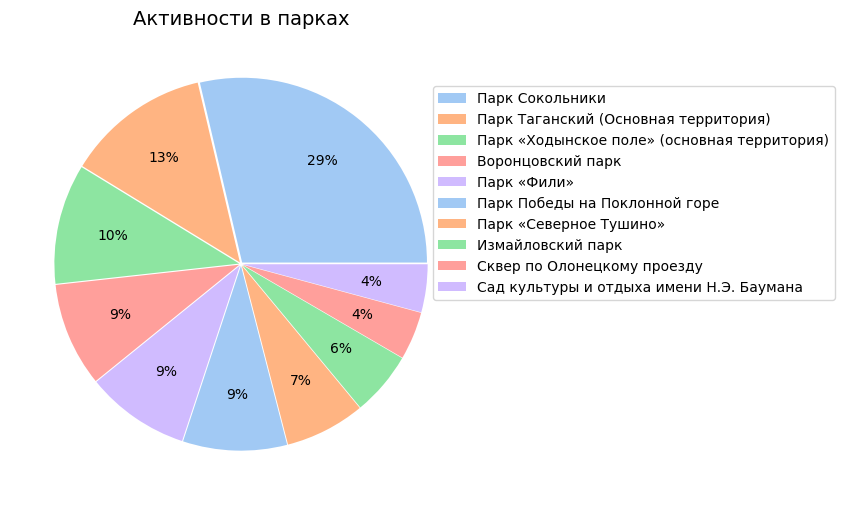

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Построение диаграммы

# data.plot.pie(autopct="%.1f%%");
pie, ax = plt.subplots(figsize=[11,6])
colors = sns.color_palette('pastel')[0:5]
labels = ['']*len(byname.index) #byname.keys() 
plt.pie(x=byname,  autopct="%.0f%%", colors=colors, labels=labels, #center=(-2,0),
        pctdistance=.7, explode=[0.01]*len(labels))  
plt.title("Активности в парках", fontsize=14);
plt.legend(byname.index, 
           bbox_to_anchor=(.9,1,0.1,-.1))
pie.savefig("ParkActivitiesShares.png", bbox_inches='tight')

In [4]:
data = df.loc[:,['CourseName','Name','CoursesTimetable','CoursesDescription']] 
data.columns = ['Мероприятие','Парк','Расписание','Описание']
# data.set_index('Парк', inplace=True)
data.head()


,Мероприятие,Парк,Расписание,Описание
0,Английский язык для детей,Сад культуры и отдыха имени Н.Э. Баумана,"Воскресенье, 16:00–17:00, 17:00–18:00",В непринужденной игровой обстановке участники ...
1,Киноклуб на английском языке,Сад культуры и отдыха имени Н.Э. Баумана,"Пятница, 20:30–22:00",Для гостей сада от 16 лет проходят встречи язы...
2,Цигун на открытом воздухе,Сад культуры и отдыха имени Н.Э. Баумана,"Воскресенье, 14:00–16:00",Занятия проходят по методу фалунь дафа — совер...
3,Мастер-классы по парным танцам на льду,Сад культуры и отдыха имени Н.Э. Баумана,"Суббота, 17:00–18:00",На катке в саду имени Баумана будут организова...
4,Мастерские театрального художника,Сад культуры и отдыха имени Н.Э. Баумана,"Вторник, 15:00–16:00, с декабря",На встречах с детским театром «Домик Фанни Бэл...


In [7]:
import binascii
import pdfkit
from jinja2 import Template

# Включение винарного представления картинки прямо в текст HTML
with open('ParkActivitiesShares.png', 'rb') as file:
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")

pd.set_option('display.max_colwidth', 1000) #?????


In [8]:
# Формируем HTML - шаблон и документ на его основе
# Добиваемся красивого представления таблицы в документе

# !pip install pretty-html-table

import pretty_html_table

html_template = '''<html>
<head>
    <title>Мероприятия в парках Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Доля активностей по паркам</h1>
    <img src="{{data.image}}"  alt="Распределение посетителей">
    <h2>Расписание мероприятий в парках</h2>
    {{data.table}}
</body>
</html>'''

html = Template(html_template).render(data = {
    'image': img,
    'table': pretty_html_table.build_table(data, 'blue_light')
})
# with open('html2.html', 'w', encoding='utf-8') as h:
#     h.write(html)

In [9]:
# Генерация PDF-документа по HTML-шаблону

config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'Moscow Activities 2019.pdf',
                  configuration=config, options = options)

True

In [10]:
# Сколько активностей Тайцзицюань есть в парках Москвы?

print(f"Мероприятий по Тайцзицюань: {df[df.CourseName.str.contains('Тайцзицюань')].shape[0]}")

Мероприятий по Тайцзицюань: 1
